In [1]:
# Imports
import numpy as np
import pandas as pd
import sys
import os
from sklearn.preprocessing import LabelEncoder
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# D√©finir le chemin du projet
notebook_dir = Path().absolute()
project_dir = notebook_dir.parent if notebook_dir.name == 'notebooks' else notebook_dir
data_dir = os.path.join(project_dir, 'data', 'source')

# Ajouter le r√©pertoire parent (racine du projet) au path
sys.path.append(os.path.abspath('..'))

In [2]:
# Configuration MLflow
import mlflow
import mlflow.sklearn
from datetime import datetime

# Fermer tout run actif (si un ancien run est encore ouvert)
while mlflow.active_run():
    run_info = mlflow.active_run().info
    print(f"Fermeture du run pr√©c√©dent: {run_info.run_name} (id: {run_info.run_id})")
    mlflow.end_run()

# D√©finir l'URI de tracking MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Nom de l'exp√©rience
experiment_name = "1-credit-scoring-exploration"
mlflow.set_experiment(experiment_name)

# D√©marrer un run MLflow manuellement
mlflow_run = mlflow.start_run(run_name="data_exploration_analysis")

# V√©rification
print(f"MLflow - Exp√©rience: {experiment_name}")
print(f"Run d√©marr√©: {mlflow_run.info.run_name} (id: {mlflow_run.info.run_id})")

MLflow - Exp√©rience: 1-credit-scoring-exploration
Run d√©marr√©: data_exploration_analysis (id: 01a3e596b44840c580904bb8d33e61ec)


# application_{train|test}.csv : Donn√©es principales des demandes de pr√™t

In [3]:
# Parametres
mlflow.log_param("train_dataset_path", "application_train.csv")
mlflow.log_param("test_dataset_path", "application_test.csv")
mlflow.log_param("exploration_date", datetime.now().strftime("%Y-%m-%d"))
mlflow.log_param("analyst", "Brice_B√©chet")

# Charger les donn√©es d'entra√Ænement
print("Chargement des donn√©es d'entra√Ænement...")
app_train = pd.read_csv(os.path.join(data_dir, 'application_train.csv'))
print(f"Forme des donn√©es d'entra√Ænement: {app_train.shape}")

# Charger les donn√©es de test
app_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'))
print(f"Forme des donn√©es de test: {app_test.shape}")

# Tracking
mlflow.log_param("train_rows", app_train.shape[0])
mlflow.log_param("train_columns", app_train.shape[1])
mlflow.log_param("test_rows", app_test.shape[0])
mlflow.log_param("test_columns", app_test.shape[1])

# Aper√ßu des donn√©es d'entra√Ænement
app_train.head()

Chargement des donn√©es d'entra√Ænement...
Forme des donn√©es d'entra√Ænement: (307511, 122)
Forme des donn√©es de test: (48744, 121)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Aper√ßu des donn√©es de test
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Distribution de la variable cible:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Pourcentage de d√©fauts de paiement: 8.07%


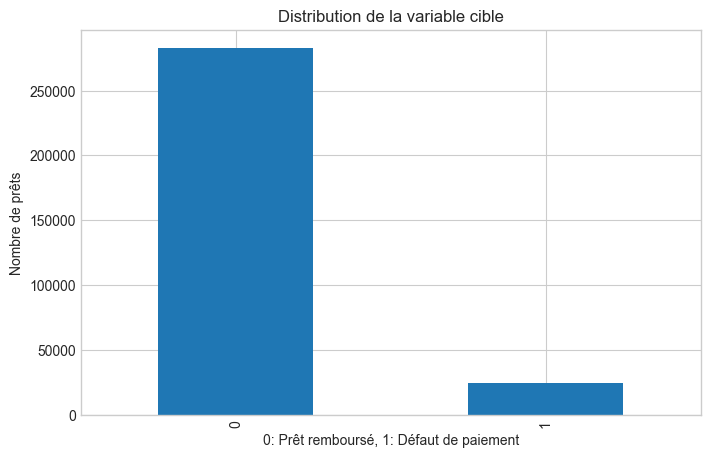

In [5]:
# Examiner la distribution de la variable cible
print("Distribution de la variable cible:")
target_counts = app_train['TARGET'].value_counts()
print(target_counts)
default_rate = target_counts[1] / len(app_train) * 100
print(f"Pourcentage de d√©fauts de paiement: {default_rate:.2f}%")

# Tracking
mlflow.log_metric("total_samples", len(app_train))
mlflow.log_metric("class_0_count", int(target_counts[0]))
mlflow.log_metric("class_1_count", int(target_counts[1]))
mlflow.log_metric("default_rate_percent", default_rate)
mlflow.log_metric("imbalance_ratio", target_counts[0]/target_counts[1])

# Visualisation de la distribution de la cible
plt.figure(figsize=(8, 5))
app_train['TARGET'].value_counts().plot.bar()
plt.title('Distribution de la variable cible')
plt.xlabel('0: Pr√™t rembours√©, 1: D√©faut de paiement')
plt.ylabel('Nombre de pr√™ts')
plt.show()

Distribution de la variable cible (TARGET) avec un d√©s√©quilibre des classes dans le dataset:
- Classe 0 (Pr√™t rembours√©) : 282686 instances (91,3%)
- Classe 1 (D√©faut de paiement) : 24825 instances (8,07%)

e-mail de Micha√´l : "Concernant l'√©laboration du mod√®le soyez vigilant sur deux points sp√©cifiques au contexte m√©tier :
- Le d√©s√©quilibre entre le nombre de bons et de moins bons clients doit √™tre pris en compte pour √©laborer un mod√®le pertinent, avec une m√©thode au choix
- Le d√©s√©quilibre du co√ªt m√©tier entre un faux n√©gatif (FN - mauvais client pr√©dit bon client : donc cr√©dit accord√© et perte en capital) et un faux positif (FP - bon client pr√©dit mauvais : donc refus cr√©dit et manque √† gagner en marge) Vous pourrez supposer, par exemple, que le co√ªt d'un FN est dix fois sup√©rieur au co√ªt d'un FP"

In [6]:
# Fonction pour examiner les valeurs manquantes
def missing_values_table(df):
    # Total des valeurs manquantes
    mis_val = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Cr√©er une table avec les r√©sultats
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renommer les colonnes
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Valeurs manquantes', 1: '% du total'})
    
    # Trier par pourcentage de valeurs manquantes d√©croissant
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% du total', ascending=False).round(1)
    
    # Informations r√©capitulatives
    print(f"Le dataframe contient {df.shape[1]} colonnes.")
    print(f"Il y a {mis_val_table_ren_columns.shape[0]} colonnes avec des valeurs manquantes.")
    
    # Retourner le dataframe avec les informations sur les valeurs manquantes
    return mis_val_table_ren_columns

In [7]:
# Statistiques sur les valeurs manquantes
missing_values = missing_values_table(app_train)

# Qualit√© des donn√©es
total_missing = app_train.isnull().sum().sum()
total_cells = app_train.shape[0] * app_train.shape[1]
missing_percentage = (total_missing / total_cells) * 100

mlflow.log_metric("total_missing_values", int(total_missing))
mlflow.log_metric("missing_percentage", missing_percentage)
mlflow.log_metric("columns_with_missing", int(missing_values.shape[0]))
mlflow.log_metric("complete_columns", int(app_train.shape[1] - missing_values.shape[0]))

# Examiner les types de colonnes
print("Nombre de colonnes par type de donn√©es:")
type_counts = app_train.dtypes.value_counts()
print(type_counts)

# Types de donn√©es
mlflow.log_metric("float64_columns", int(type_counts.get('float64', 0)))
mlflow.log_metric("int64_columns", int(type_counts.get('int64', 0)))
mlflow.log_metric("object_columns", int(type_counts.get('object', 0)))

print(f"Qualit√© des donn√©es track√©e - {missing_percentage:.1f}% de valeurs manquantes")

missing_values.head(20)

Le dataframe contient 122 colonnes.
Il y a 67 colonnes avec des valeurs manquantes.
Nombre de colonnes par type de donn√©es:
float64    65
int64      41
object     16
Name: count, dtype: int64
Qualit√© des donn√©es track√©e - 24.4% de valeurs manquantes


Valeurs manquantes  % du total
COMMONAREA_MEDI                       214865        69.9
COMMONAREA_AVG                        214865        69.9
COMMONAREA_MODE                       214865        69.9
NONLIVINGAPARTMENTS_MEDI              213514        69.4
NONLIVINGAPARTMENTS_MODE              213514        69.4
NONLIVINGAPARTMENTS_AVG               213514        69.4
FONDKAPREMONT_MODE                    210295        68.4
LIVINGAPARTMENTS_MODE                 210199        68.4
LIVINGAPARTMENTS_MEDI                 210199        68.4
LIVINGAPARTMENTS_AVG                  210199        68.4
FLOORSMIN_MODE                        208642        67.8
FLOORSMIN_MEDI                        208642        67.8
FLOORSMIN_AVG                         208642        67.8
YEARS_BUILD_MODE                      204488        66.5
YEARS_BUILD_MEDI                      204488        66.5
YEARS_BUILD_AVG                       204488        66.5
OWN_CAR_AGE                           202929        66.0
LANDAREA_AVG                          182590        59.4
LANDAREA_MEDI                         182590        59.4
LANDAREA_MODE                         182590        59.4

In [8]:
# Examiner les variables cat√©gorielles
print("\nNombre de valeurs uniques dans chaque colonne cat√©gorielle:")
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)


Nombre de valeurs uniques dans chaque colonne cat√©gorielle:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Nombre total de colonnes : 122
- Colonnes avec valeurs manquantes : 67 (55% des colonnes)
- Types de donn√©es :
    - 16 colonnes cat√©gorielles (type 'object')
    - 106 colonnes num√©riques (41 de types 'int64' et 65 de type 'float64)
    - 65 colonnes de type float64 (valeurs num√©riques avec d√©cimales)
- Variables cat√©gorielle binaires (2 cat√©gories) :
    - NAME_CONTRACT_TYPE (type de contrat)
    - FLAG_OWN_CAR (possession d'une voiture)
    - FLAG_OWN_REALTY (possession d'un bien immobilier)
    - MERGENCYSTATE_MODE (√©tat d'urgence)
- Variables avec peu de cat√©gories (3-8 cat√©gories) :
    - CODE_GENDER (3 cat√©gories, probablement M/F/Autre)
    - NAME_EDUCATION_TYPE (5 cat√©gories)
    - NAME_FAMILY_STATUS (6 cat√©gories)
    - NAME_HOUSING_TYPE (6 cat√©gories)
    - NAME_TYPE_SUITE (7 cat√©gories)
    - NAME_INCOME_TYPE (8 cat√©gories)
- Variables avec de nombreuses cat√©gories :
    - OCCUPATION_TYPE (18 cat√©gories)
    - ORGANIZATION_TYPE (58 cat√©gories)

# Traitement des variables cat√©gorielles

In [9]:
# Label Encoding pour les variables binaires
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1

print(f"{le_count} colonnes ont √©t√© encod√©es avec LabelEncoder.")

# One-hot encoding des variables cat√©gorielles
features_before_encoding = app_train.shape[1]
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Forme des caract√©ristiques apr√®s one-hot encoding:')
print(f'Entra√Ænement: {app_train.shape}')
print(f'Test: {app_test.shape}')

# Aligner les donn√©es d'entra√Ænement et de test
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join='inner', axis=1)
app_train['TARGET'] = train_labels

print('Forme des caract√©ristiques apr√®s alignement:')
print(f'Entra√Ænement: {app_train.shape}')
print(f'Test: {app_test.shape}')

# Tracking
mlflow.log_param("label_encoded_columns", le_count)
mlflow.log_param("one_hot_encoding_applied", True)
mlflow.log_param("features_before_encoding", features_before_encoding)
mlflow.log_metric("features_after_encoding_train", app_train.shape[1])
mlflow.log_metric("features_after_encoding_test", app_test.shape[1])
mlflow.log_metric("features_after_alignment_train", app_train.shape[1])
mlflow.log_metric("features_after_alignment_test", app_test.shape[1])

3 colonnes ont √©t√© encod√©es avec LabelEncoder.
Forme des caract√©ristiques apr√®s one-hot encoding:
Entra√Ænement: (307511, 243)
Test: (48744, 239)
Forme des caract√©ristiques apr√®s alignement:
Entra√Ænement: (307511, 240)
Test: (48744, 239)


# Analyse des anomalies

In [10]:
# Examiner DAYS_BIRTH (√¢ge en jours n√©gatifs)
print("Statistiques pour l'√¢ge (DAYS_BIRTH / -365):")
print((app_train['DAYS_BIRTH'] / -365).describe())

# Examiner DAYS_EMPLOYED (jours d'emploi)
print("\nStatistiques pour les jours d'emploi (DAYS_EMPLOYED):")
print(app_train['DAYS_EMPLOYED'].describe())

Statistiques pour l'√¢ge (DAYS_BIRTH / -365):
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Statistiques pour les jours d'emploi (DAYS_EMPLOYED):
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


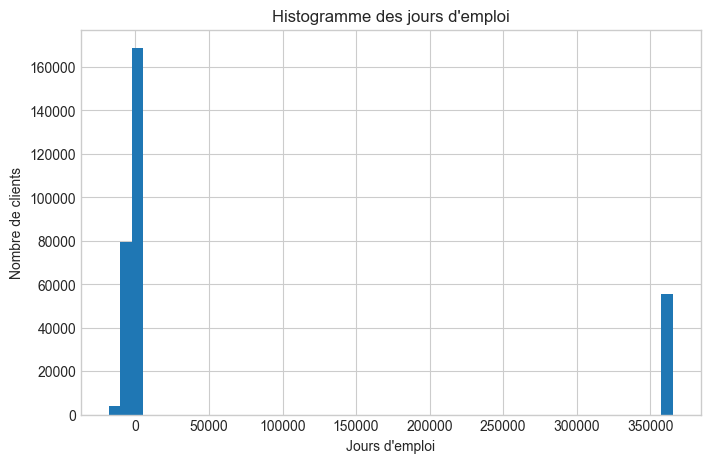

In [11]:
# Visualiser la distribution des jours d'emploi
app_train['DAYS_EMPLOYED'].hist(bins=50)
plt.title('Histogramme des jours d\'emploi')
plt.xlabel('Jours d\'emploi')
plt.ylabel('Nombre de clients')
plt.show()

In [12]:
# Identifier les anomalies dans DAYS_EMPLOYED
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print(f'Les clients sans anomalies font d√©faut sur {100 * non_anom["TARGET"].mean():.2f}% des pr√™ts')
print(f'Les clients avec anomalies font d√©faut sur {100 * anom["TARGET"].mean():.2f}% des pr√™ts')
print(f'Il y a {len(anom)} jours d\'emploi anomaux')

# Anomalies
anomaly_count = len(anom)
anomaly_percentage = (anomaly_count / len(app_train)) * 100

mlflow.log_param("anomaly_value_detected", 365243)
mlflow.log_param("anomaly_treatment", "replace_with_nan_and_flag")
mlflow.log_metric("anomaly_count", anomaly_count)
mlflow.log_metric("anomaly_percentage", anomaly_percentage)
mlflow.log_metric("anomaly_default_rate", anom["TARGET"].mean() * 100)
mlflow.log_metric("normal_default_rate", non_anom["TARGET"].mean() * 100)

# Impact de l'anomalie
impact = abs(anom["TARGET"].mean() - non_anom["TARGET"].mean()) * 100
mlflow.log_metric("anomaly_impact_on_default", impact)

# Cr√©er une caract√©ristique d'indicateur d'anomalie
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

# Remplacer les valeurs anomales par NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print(f"Anomalies track√©es - {anomaly_count:,} cas d√©tect√©s ({anomaly_percentage:.1f}%)")

Les clients sans anomalies font d√©faut sur 8.66% des pr√™ts
Les clients avec anomalies font d√©faut sur 5.40% des pr√™ts
Il y a 55374 jours d'emploi anomaux
Anomalies track√©es - 55,374 cas d√©tect√©s (18.0%)


Statistiques des jours d'emploi
- Valeur maximale : 365243 jours (l'anomalie identifi√©e)
- Valeurs n√©gatives : La plupart des valeurs sont n√©gatives (comme pour DAYS_BIRTH)
- Ecart tr√®s important entre moyenne (63815) et m√©diane (-1213) : forte asym√©trie due √† l'anomalie


Statistiques de l'√¢ge
- √Çge moyen : environ 44 ans
- √Çge minimal : 20.5 ans
- √Çge maximal : 69.1 ans
- Ecart entre moyenne et m√©diane faible : distribution relativement normale


Taux de d√©faut
- Clients sans anomalies : 8.66% de d√©faut
- Clients avec anomalies : 5.40% de d√©faut

"La gestion des anomalies d√©pend de la situation exacte, sans r√®gles √©tablies. L'une des approches les plus s√ªres consiste simplement √† remplacer les anomalies par une valeur manquante puis √† les combler (par imputation) avant l'apprentissage automatique. Dans  ce cas, puisque toutes les anomalies ont exactement la m√™me valeur, nous voulons les  remplacer par la m√™me valeur au cas o√π tous ces pr√™ts auraient quelque chose en commun. Les valeurs anomales semblent avoir une certaine importance, nous voulons  donc indiquer au mod√®le d'apprentissage automatique si nous avons effectivement
 remplac√© ces valeurs. Comme solution, nous remplacerons les valeurs anomales par 'not a number' (np.nan) puis cr√©erons une nouvelle colonne bool√©enne indiquant si la valeur √©tait anomale ou non." Will Koehrsen

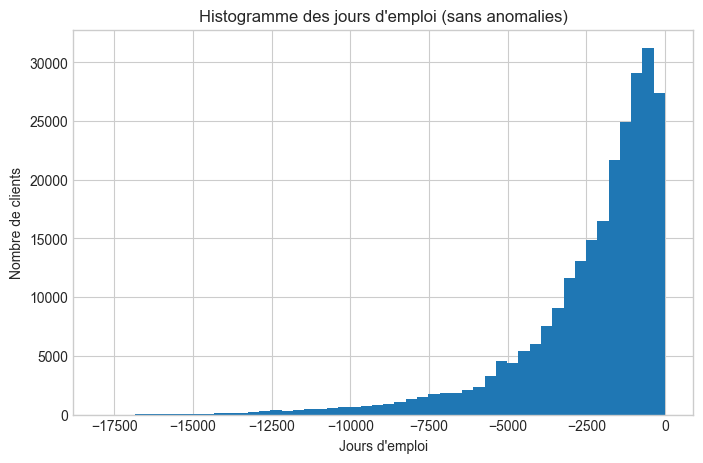

In [13]:
# Visualiser la distribution apr√®s correction
app_train['DAYS_EMPLOYED'].hist(bins=50)
plt.title('Histogramme des jours d\'emploi (sans anomalies)')
plt.xlabel('Jours d\'emploi')
plt.ylabel('Nombre de clients')
plt.show()

- Toutes les valeurs sont n√©gatives car elles repr√©sentent le nombre de jours avant la demande de pr√™t actuelle.
- La plupart des clients ont des emplois relativement r√©cents (<2500 derniers jours  soit env. 7 ans).
- Pic pr√®s de 0 pourrait indiquer des clients qui viennent de commencer un nouvel  emploi.
- Distribution asym√©trique

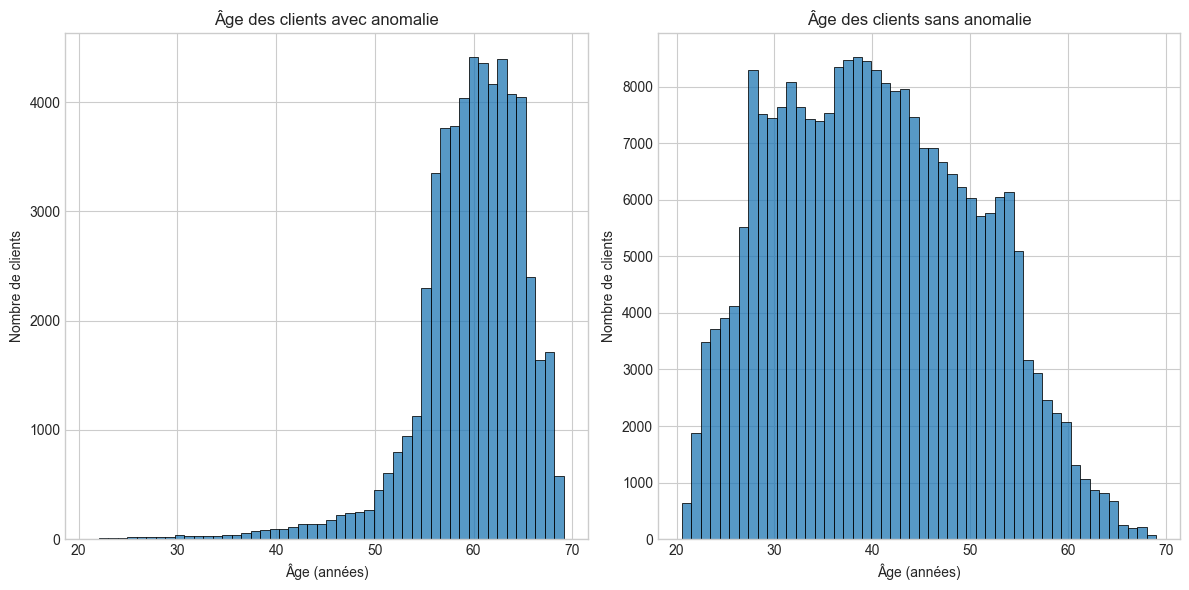

In [14]:
# Cr√©er une visualisation de l'√¢ge des clients avec et sans anomalie
plt.figure(figsize=(12, 6))

# Distribution de l'√¢ge pour les clients avec anomalie
plt.subplot(1, 2, 1)
sns.histplot(anom['DAYS_BIRTH'] / -365, bins=50)
plt.title('√Çge des clients avec anomalie')
plt.xlabel('√Çge (ann√©es)')
plt.ylabel('Nombre de clients')

# Distribution de l'√¢ge pour les clients sans anomalie
plt.subplot(1, 2, 2)
sns.histplot(non_anom['DAYS_BIRTH'] / -365, bins=50)
plt.title('√Çge des clients sans anomalie')
plt.xlabel('√Çge (ann√©es)')
plt.ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

In [15]:
# Cr√©er les sous-ensembles avec et sans anomalie
anom = app_train[app_train['DAYS_EMPLOYED_ANOM'] == True]
non_anom = app_train[app_train['DAYS_EMPLOYED_ANOM'] == False]

# Rechercher les colonnes one-hot pour le type de revenu
income_type_cols = [col for col in app_train.columns if 'NAME_INCOME_TYPE_' in col]

# Afficher la distribution par type de client
print("Distribution des types de revenus par groupe de clients:")
if len(anom) > 0:
    for col in income_type_cols:
        income_type = col.replace('NAME_INCOME_TYPE_', '')
        anom_pct = anom[col].mean() * 100
        non_anom_pct = non_anom[col].mean() * 100
        print(f"{income_type:<20} - Avec anomalie: {anom_pct:>6.2f}% | Sans anomalie: {non_anom_pct:>6.2f}%")
else:
    for col in income_type_cols:
        income_type = col.replace('NAME_INCOME_TYPE_', '')
        total_pct = app_train[col].mean() * 100
        print(f"{income_type:<20} - Total: {total_pct:>6.2f}%")

Distribution des types de revenus par groupe de clients:
Businessman          - Avec anomalie:   0.00% | Sans anomalie:   0.00%
Commercial associate - Avec anomalie:   0.00% | Sans anomalie:  28.40%
Pensioner            - Avec anomalie:  99.96% | Sans anomalie:   0.00%
State servant        - Avec anomalie:   0.00% | Sans anomalie:   8.61%
Student              - Avec anomalie:   0.00% | Sans anomalie:   0.01%
Unemployed           - Avec anomalie:   0.04% | Sans anomalie:   0.00%
Working              - Avec anomalie:   0.00% | Sans anomalie:  62.97%


Les clients avec anomalie sont les clients retrait√©s

In [16]:
# Identifier les clients sans revenus
no_income_mask = (app_train['AMT_INCOME_TOTAL'] == 0) | (app_train['AMT_INCOME_TOTAL'].isnull())
clients_no_income = app_train[no_income_mask]
clients_with_income = app_train[~no_income_mask]

# Statistiques
total_clients = len(app_train)
no_income_count = len(clients_no_income)
no_income_pct = (no_income_count / total_clients) * 100

print(f" Analyse des revenus:")
print(f" Total clients: {total_clients:,}")
print(f" Clients sans revenus: {no_income_count:,} ({no_income_pct:.2f}%)")

if no_income_count > 0:
    # Analyse des pr√™ts accord√©s
    no_income_target = clients_no_income['TARGET']
    default_rate_no_income = no_income_target.mean() * 100
    
    print(f" Taux de d√©faut (sans revenus): {default_rate_no_income:.2f}%")
    print(f" Taux de d√©faut (avec revenus): {clients_with_income['TARGET'].mean() * 100:.2f}%")
    
    # Montants des pr√™ts
    credit_amounts_no_income = clients_no_income['AMT_CREDIT'].describe()
    print(f"\n Montants de cr√©dit (clients sans revenus):")
    print(credit_amounts_no_income)
    
    # Types de revenus des clients "sans revenus"
    print(f"\nTypes de revenus d√©clar√©s (clients 'sans revenus'):")
    income_types = clients_no_income['NAME_INCOME_TYPE'].value_counts()
    print(income_types)
    
    # Tracking MLflow
    mlflow.log_metric("clients_no_income_count", no_income_count)
    mlflow.log_metric("clients_no_income_pct", no_income_pct)
    mlflow.log_metric("default_rate_no_income", default_rate_no_income)
    mlflow.log_metric("default_rate_with_income", clients_with_income['TARGET'].mean() * 100)
else:
    print(" Tous les clients ont des revenus d√©clar√©s")
    mlflow.log_param("all_clients_have_income", True)

 Analyse des revenus:
 Total clients: 307,511
 Clients sans revenus: 0 (0.00%)
 Tous les clients ont des revenus d√©clar√©s


In [17]:
# Isoler uniquement les variables num√©riques pour la corr√©lation
numeric_columns = app_train.select_dtypes(include=['int64', 'float64']).columns

# Calculer les corr√©lations avec la cible (uniquement pour les variables num√©riques)
correlations = app_train[numeric_columns].corr()['TARGET'].sort_values()

# Afficher les corr√©lations les plus importantes
print('Corr√©lations les plus positives:')
print(correlations.tail(15))

print('\nCorr√©lations les plus n√©gatives:')
print(correlations.head(15))

Corr√©lations les plus positives:
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corr√©lations les plus n√©gatives:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE  

 Facteurs augmentant la probabilit√© de d√©faut
- Une p√©riode d'emploi plus longue* (DAYS_EMPLOYED 0.075) *valeurs n√©gatives, une corr√©lation positive signifie en r√©alit√© que moins de jours d'emploi (emploi plus r√©cent) augmente le risque
- Vivre dans une r√©gion mal not√©e (REGION_RATING_CLIENT_W_CITY 0.061, REGION_RATING_CLIENT 0.059)
- Avoir un document d'identit√© √©mis il y a plus longtemps* (DAYS_ID_PUBLISH 0.051) *valeurs n√©gatives
- Avoir √©t√© enregistr√© il y a plus longtemps* (DAYS_REGISTRATION 0.042) - *valeurs n√©gatives
- Avoir chang√© de t√©l√©phone il y a plus longtemps* (DAYS_LAST_PHONE_CHANGE 0.055) - *valeurs n√©gatives
- Travailler dans une ville diff√©rente de celle o√π l'on est enregistr√©  (REG_CITY_NOT_WORK_CITY 0.051)
- Avoir un t√©l√©phone professionnel (FLAG_EMP_PHONE 0.046)
- √ätre enregistr√© dans une ville diff√©rente de celle o√π l'on vit (REG_CITY_NOT_LIVE_CITY 0.044)
- Poss√©der certains documents sp√©cifiques (FLAG_DOCUMENT_3 0.044)
- Poss√©der une voiture plus ancienne (OWN_CAR_AGE 0.038)


Facteurs r√©duisant la probabilit√© de d√©faut
- Scores externes √©lev√©s (EXT_SOURCE_3 -0.179, EXT_SOURCE_2 -0.160, EXT_SOURCE_1 -0.155)
- √ätre plus jeune* (DAYS_BIRTH -0.078) - *valeurs n√©gatives, donc une corr√©lation n√©gative signifie en r√©alit√© que plus d'√¢ge (client plus √¢g√©) r√©duit le risque
- Vivre dans un immeuble avec plus d'√©tages (FLOORSMAX_AVG -0.044, FLOORSMAX_MEDI -0.044, FLOORSMAX_MODE -0.043)
- Prix des biens achet√©s plus √©lev√© (AMT_GOODS_PRICE -0.040)
- Vivre dans une r√©gion plus peupl√©e (REGION_POPULATION_RELATIVE -0.037)
- Habiter dans un immeuble avec ascenseurs (ELEVATORS_AVG -0.034, ELEVATORS_MEDI -0.034)
- Disposer d'une superficie habitable plus grande (LIVINGAREA_AVG -0.033, LIVINGAREA_MEDI -0.033)


 !!! Note importante sur l'interpr√©tation des variables temporelles
 - Dans ce dataset, les variables temporelles comme DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH et DAYS_LAST_PHONE_CHANGE sont exprim√©es en jours n√©gatifs par rapport √† la date de la demande de pr√™t. Plus la valeur est n√©gative (plus le nombre est grand en valeur absolue), plus l'√©v√©nement est ancien. Ainsi, l'interpr√©tation des corr√©lations pour ces variables doit √™tre invers√©e:
- Une corr√©lation positive avec des jours n√©gatifs signifie que plus l'√©v√©nement est r√©cent, plus le risque augmente
- Une corr√©lation n√©gative avec des jours n√©gatifs signifie que plus l'√©v√©nement est ancien, plus le risque augmente
- C'est pourquoi, bien que DAYS_BIRTH ait une corr√©lation n√©gative (-0.078), cela indique en r√©alit√© que les clients plus √¢g√©s ont un risque de d√©faut plus faible

In [18]:
# Analyser la relation entre l'√¢ge et le remboursement
# Convertir en valeur absolue pour faciliter l'interpr√©tation
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
age_target_corr = app_train['DAYS_BIRTH'].corr(app_train['TARGET'])
print(f"Corr√©lation entre l'√¢ge et la cible: {age_target_corr}")

# Statistiques
age_years = app_train['DAYS_BIRTH'] / 365
mlflow.log_metric("age_mean", float(age_years.mean()))
mlflow.log_metric("age_median", float(age_years.median()))
mlflow.log_metric("age_min", float(age_years.min()))
mlflow.log_metric("age_max", float(age_years.max()))
mlflow.log_metric("age_target_correlation", float(age_target_corr))

Corr√©lation entre l'√¢ge et la cible: -0.07823930830982691


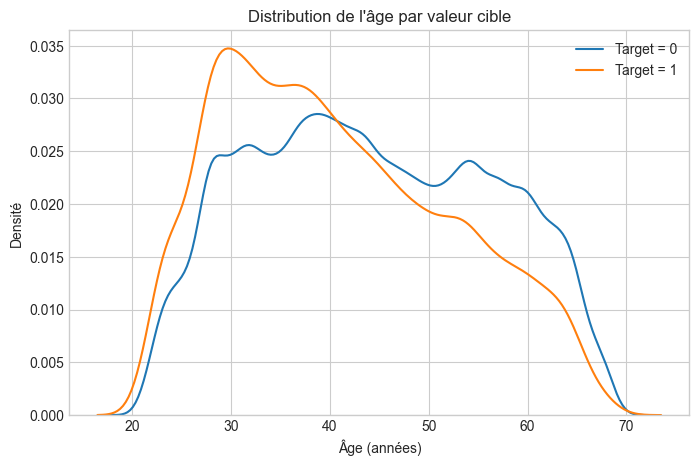

In [19]:
# KDE plot de l'√¢ge par valeur cible
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='Target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='Target = 1')
plt.xlabel('√Çge (ann√©es)')
plt.ylabel('Densit√©')
plt.title('Distribution de l\'√¢ge par valeur cible')
plt.legend()
plt.show()

- Courbe bleue: clients qui ont rembours√© leur pr√™t (TARGET = 0) 
- Courbe rouge: clients en d√©faut de paiement (TARGET = 1)

L'analyse des distributions par valeur cible r√©v√®le que les clients en d√©faut sont concentr√©s dans les tranches d'√¢ge plus jeunes (pic autour de 29 ans). Les clients qui
 remboursent ont une distribution plus √©tal√©e et plus √¢g√©e

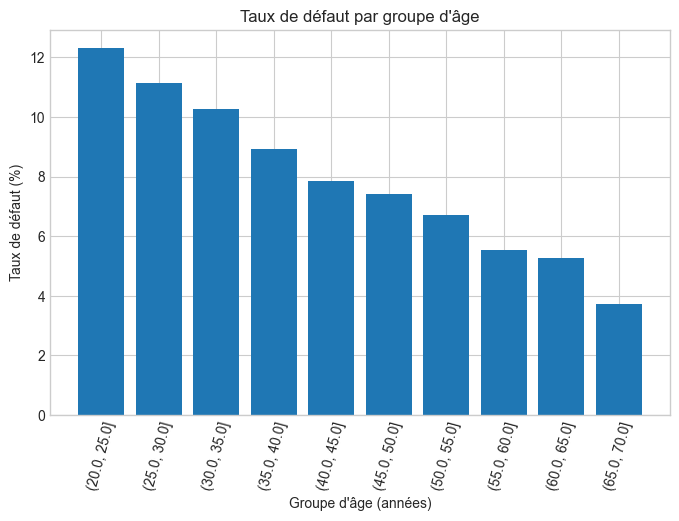

In [20]:
# Analyser l'√¢ge par tranches
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Diviser l'√¢ge en tranches
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))
age_groups = age_data.groupby('YEARS_BINNED').mean()

# Visualiser le taux de d√©faut par tranche d'√¢ge
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('Groupe d\'√¢ge (ann√©es)')
plt.ylabel('Taux de d√©faut (%)')
plt.title('Taux de d√©faut par groupe d\'√¢ge')
plt.show()

Taux de d√©faut par groupe d'√¢ge montre que le taux de d√©faut diminue r√©guli√®rement avec l'√¢ge, passant de plus de 12% pour les 20-25 ans √† moins de 4% pour les 65-70 ans.  La baisse la plus marqu√©e se situe entre les adultes de 20 √† 35 ans et les adultes de 35 √† 50 ans Chez les seniors, les taux de d√©faut sont les plus bas.

Implications pour le mod√®le de scoring La relationj est claire entre l'√¢ge et le taux de d√©faut, l'age devra etre integr√© dans le modele de scoring

# Analyse des sources externes
 Dans la documentation, les varaibles EXT_SOURCE_ sotn d√©finies comme "Score normalis√© provenant d'une source de donn√©es externe, normalis√©" Le terme "normalis√©" dans ce contexte signifie probablement que les scores ont √©t√© ajust√©s pour suivre une distribution standard (comme une distribution normale avec moyenne 0 et √©cart-type 1, ou une √©chelle de 0 √† 1) afin de faciliter les comparaisons et l'utilisation dans des mod√®les statistiques

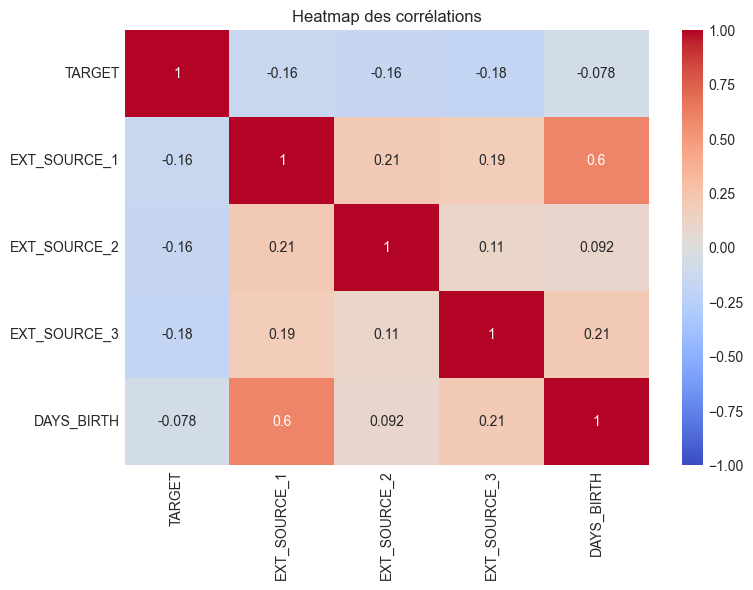

In [21]:
# Extraire les variables EXT_SOURCE et visualiser leurs corr√©lations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

# Log des statistiques dans MLflow
for i in [1, 2, 3]:
    col = f'EXT_SOURCE_{i}'
    if col in app_train.columns:
        correlation = app_train[col].corr(app_train['TARGET'])
        missing_pct = app_train[col].isnull().mean() * 100
        mean_value = app_train[col].mean()
        mlflow.log_metric(f"ext_source_{i}_correlation", float(correlation))
        mlflow.log_metric(f"ext_source_{i}_missing_pct", missing_pct)
        mlflow.log_metric(f"ext_source_{i}_mean", float(mean_value))

# Visualiser leurs corr√©lations
plt.figure(figsize=(8, 6))
sns.heatmap(ext_data_corrs, cmap=plt.cm.coolwarm, vmin=-1, annot=True, vmax=1)
plt.title('Heatmap des corr√©lations')
plt.tight_layout()
plt.show()

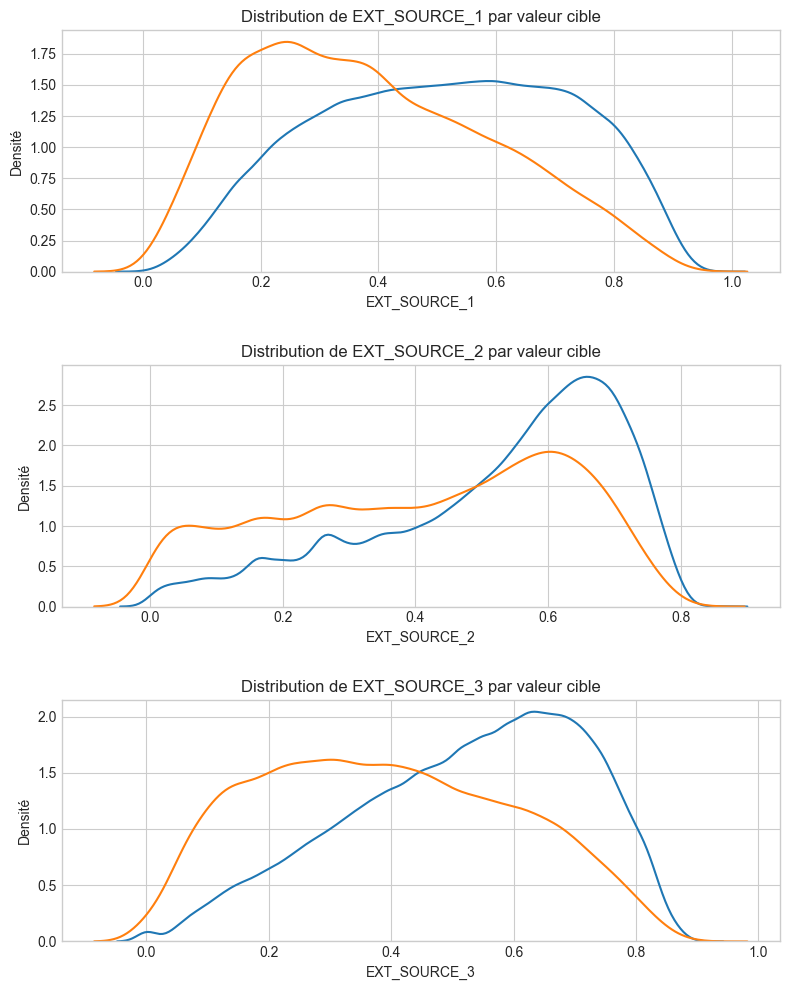

In [22]:
# Visualiser la distribution des sources externes par valeur cible
plt.figure(figsize=(8, 10))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='Target = 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='Target = 1')
    plt.title(f'Distribution de {source} par valeur cible')
    plt.xlabel(source)
    plt.ylabel('Densit√©')
    
plt.tight_layout(h_pad=2.5)
plt.show()

Corr√©lations avec la cible (TARGET):
- Les 3 scores externes ont des corr√©lations n√©gatives avec la cible: EXT_SOURCE_3:-0.18 / EXT_SOURCE_2: -0.16 / EXT_SOURCE_1: -0.16
- L'√¢ge (DAYS_BIRTH): -0.078 (Attention: comme DAYS_BIRTH est exprim√© en jours n√©gatifs, cette corr√©lation n√©gative indique que les clients plus √¢g√©s ont un risque de
 d√©faut plus faible)


Corr√©lations entre EXT_SOURCE_1 et l'√¢ge:
- EXT_SOURCE_1 et DAYS_BIRTH ont une forte corr√©lation positive (0.6)
- Comme DAYS_BIRTH est n√©gatif, cela signifie que EXT_SOURCE_1 augmente avec l'√¢ge (valeurs plus n√©gatives = personnes plus √¢g√©es) Donc EXT_SOURCE_1 semble
 √™tre un score qui favorise les clients plus √¢g√©s


Corr√©lations entre les sources externes:
- EXT_SOURCE_1 et EXT_SOURCE_2: 0.21
- EXT_SOURCE_1 et EXT_SOURCE_3: 0.19
- EXT_SOURCE_2 et EXT_SOURCE_3: 0.11<br>
Ces corr√©lations positives mais mod√©r√©es indiquent que les 3 scores externes capturent des informations √† priori diff√©rentes.

In [23]:
if mlflow.active_run():
    run = mlflow.active_run()
    print(f" Fermeture du run MLflow: {run.info.run_name} ")
    mlflow.end_run()

print(" R√©sultat dans MLflow UI http://localhost:5000")

 Fermeture du run MLflow: data_exploration_analysis 
üèÉ View run data_exploration_analysis at: http://localhost:5000/#/experiments/250909365473291520/runs/01a3e596b44840c580904bb8d33e61ec
üß™ View experiment at: http://localhost:5000/#/experiments/250909365473291520
 R√©sultat dans MLflow UI http://localhost:5000
